<a href="https://colab.research.google.com/github/rohitmak/Application/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# divide the dataset into Dependent and Independent features

X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]
X.head()
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [ ]:
## concatenate these variables with dataframe
X = X.drop(['Geography', 'Gender'], axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

In [ ]:
# Splitting the dataset into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Why 'StandardScaler'? Why not 'min', 'max' scaler?(will be used in CNN)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part_2, let's create the ANN(Artificial Neural Network)
# We need to understand what is tensorflow and Keras?
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Let's Initialize ANN
classifier = Sequential()

In [ ]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# Early Stopping, It ensures that when the accuracy is not at all increasing the training of the model will stop automatically.
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
# Training model
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3123 - accuracy: 0.8733 - val_loss: 0.3744 - val_accuracy: 0.8489
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3118 - accuracy: 0.8698 - val_loss: 0.3768 - val_accuracy: 0.8497
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3115 - accuracy: 0.8718 - val_loss: 0.3715 - val_accuracy: 0.8482
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3123 - accuracy: 0.8688 - val_loss: 0.3757 - val_accuracy: 0.8497
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3112 - accuracy: 0.8698 - val_loss: 0.3728 - val_accuracy: 0.8482
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3120 - accuracy: 0.8707 - val_loss: 0.3751 - val_accuracy: 0.8451
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3119 - accuracy: 0.8705 - val_loss: 0.3735 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

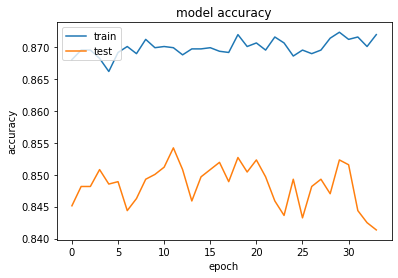

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 

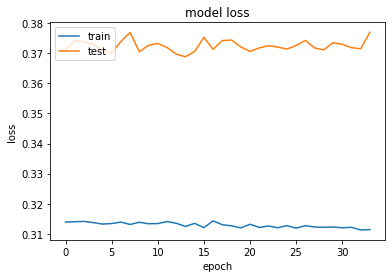

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 

In [ ]:
# Part_3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1448,  147],
       [ 176,  229]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)

In [ ]:
score

0.8385

In [ ]:
# get the weights
classifier.get_weights()

[array([[ 9.82965112e-01,  7.95322657e-02, -1.96029857e-01,
          9.23823953e-01,  8.99994597e-02,  1.49012566e-01,
          5.26668370e-01, -4.06287402e-01, -7.83659965e-02,
         -2.21008047e-01, -4.12733853e-01],
        [-1.05446672e+00,  2.96989381e-01, -3.20135385e-01,
         -1.89931154e-01,  7.04661548e-01,  1.82270944e-01,
         -2.42047191e-01,  8.58250856e-01,  9.09385264e-01,
         -6.34801507e-01, -1.01374865e+00],
        [-3.99791785e-02, -3.01856659e-02, -2.08826680e-02,
         -2.32795998e-01,  1.77399092e-03,  6.97579443e-01,
          4.36474115e-01, -3.67177963e-01,  1.82694212e-01,
          8.61522332e-02, -1.77126512e-01],
        [-7.53587112e-02, -5.89623749e-01, -1.62248433e-01,
          1.19076073e-01, -2.49703020e-01, -1.13602066e+00,
         -3.77160430e-01, -2.58068055e-01,  5.05465388e-01,
          2.21889596e-02,  5.31426668e-01],
        [-1.75552309e-01,  1.42128336e+00,  1.38949394e-01,
          9.35850680e-01, -1.94029316e-01, -